## AUC of all models

In [473]:
import pickle
import pandas as pd
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [485]:
y_pred_logreg = pd.read_csv('y_pred_lr.csv',index_col = 0)
y_pred_lr = y_pred_logreg['0'].to_numpy()

In [487]:
y_pred_gboost = pd.read_csv('gBoosting_y_proba.csv',index_col = 0)
y_pred_gb = y_pred_gboost['0'].to_numpy()

In [496]:
y_pred_nn = pickle.load(open("y_pred_nn.pkl", "rb" )).reshape(-1)
y_pred_pct = pickle.load(open("perceptron_pred_proba.pkl", "rb" ))
y_pred_svm = pickle.load(open("svm_pred_proba.pkl", "rb" ))

In [521]:
roc_auc_score(y_true,y_pred_svm ), roc_auc_score(y_true,y_pred_gb )

(0.7432733791977612, 0.742890770755597)

In [499]:
y_pred_pct

array([0.50107673, 0.48452863, 0.53922081, ..., 0.46152679, 0.41972062,
       0.45369716])

In [519]:
y_true = y_test

In [500]:
y_proba = [y_pred_lr,y_pred_svm,y_pred_pct,y_pred_gb,y_pred_nn]
name = ['Logistic Regression', 'Support Vector Machine','Perceptron',' Gradient Boosting', 'Neural Network']
recall = [
0.669,
0.656,
0.590,
0.637,
0.528]

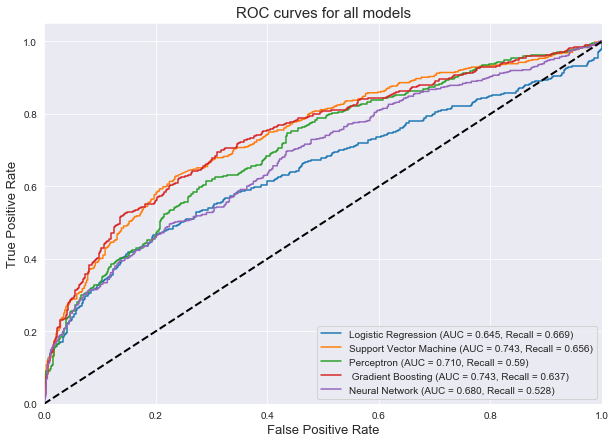

In [518]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10,7))
for i in range(len(y_proba)):    
    fpr[i], tpr[i], _ = roc_curve(y_true, y_proba[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(len(y_proba)):
    la = name[i] + ' (AUC = {:0.3f}, Recall = {})'.format(roc_auc[i], recall[i])
    plt.plot(fpr[i], tpr[i],label=la)
    
lw=2

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for all models',fontsize=15)
plt.legend(loc="lower right")
plt.savefig('AUC.png')
plt.show()
